# Assignment 3: LDA Topic Modeling

## Note
Installing Tomotopy locally can return an error, if that's the case run this notebook on Google Colab

## Research Background

LDA is a popular topic modeling algorithm widely used in the fields of Digital Humanities and Social Sciences. In the field of political communication, topic modeling is often applied for analyzing politicians Twitter/X posts, identitying thematic patterns or topics revolving around their posts.

For this assignment, students will work with tweets from two USA politicians, Donald Trump and Bernie Sanders, who are often regarded as right-wing populist and left-wing populist respectively. Right-wing populism often emphasizes nationalism, anti-immigration policies, and a critique of global elites from a culturally conservative perspective, focusing on preserving traditional values and social hierarchies. Left-wing populism prioritizes economic inequality, advocating for the redistribution of wealth, expansion of social services, and empowerment of the working class against the capitalist elite. While both forms of populism appeal to the "common people" against perceived elites and established structures, they diverge significantly in their identification of the elites, proposed solutions, and core ideologies. For a more detailed explanation, you can read the chapter by Macaulay (2019) "Bernie and The Donald: A comparison of left-and right-wing populist discourse" (full reference below).

**Research Questions**
1. What topics are revolving around Donald Trump and Bernie Sanders' posts separately?
2. What are the topic differences between Trump (right-wing popoulist) and Sanders (left-wing populist)?

**Aim:**
1. The first aim of the assignment is to conduct LDA topic modeling. Identify thematic patterns or politics revolving around Trump or Sanders's posts.
2. The second aim is to critically evaluate the results of topic modeling. Try different numbers of topics to see with which settings the topics are more coherent. Critically reflect on the results of LDA topic modeling, discussing them in relation to existing theories about populism.

**Data**
Two datasets are prepared for this assginment. Tweets from Trump and tweets from Sanders. Students are asked to work on these two datasets.

**Methods**
1. Word segamentation
2. Removing stopwords
3. LDA topic modeling
4. Topic evaulation (coherence and human evaluation)
5. Visualization of results.

**References**
1. Macaulay, M. (2019). Bernie and the Donald: A comparison of Left-and Right-wing populist discourse. *Populist discourse: International perspectives*, 165-195.





## Setup

### Q1. Install necessary libraries, including `tomotopy` and `little_mallet_wrapper`, and import them

In [1]:
# Q1 (code)
import tomotopy as tp # for toping modeling
import little_mallet_wrapper # for functions concerning topic modeling
import seaborn # for statistical visualization
import glob # for finding pathnames
from pathlib import Path # for filesystem paths with semantics appropriate for different operating systems
import pandas as pd # for data wrangling 

## Data preprocessing

### Q2. Load the two datasets and concatenate them

The goal is to run topic modelling on the combined dataset of Sanders and Trump's tweets

In [470]:
# Q2 (code)
# load datasets
sanders_df = pd.read_csv('sanders_tweets.csv', encoding = 'utf-8')
trump_df = pd.read_csv('trump_tweets.csv', encoding = 'utf-8')

# concatenate datasets

combined_df = pd.concat([sanders_df, trump_df], ignore_index = True)
combined_df.head()

,Username,TweetId,Title,Content
0,SenSanders,1351670845639421952,SenSanders_1351670845639421952,Wealth increase in past 10 months:\n⬆️$173 bil...
1,SenSanders,1351259762722279424,SenSanders_1351259762722279424,Amidst massive income and wealth inequality te...
2,SenSanders,1351242822293319680,SenSanders_1351242822293319680,"“We now have the resources, we now have the sk..."
3,SenSanders,1350885541911400448,SenSanders_1350885541911400448,"After surviving an attempt on his life, Russia..."
4,SenSanders,1349880150041780224,SenSanders_1349880150041780224,President-Elect Biden's COVID rescue plan will...


### Q3. Clean the data

Transform all tweets to lowercase, remove stopwords, punctuation, and numbers. Add the processed text to a list called `training_data`.
Create a list with the content of the tweets (`original_texts`) and a list that allows you to identify both the author of the tweet and its ID (`titles`).


In [394]:
# Q3 (code)
#  First we should make empty lists for the values
training_data = []
original_texts = []
titles = []

# Process tweets
# Define the unnecessary syntax to remove:
text_to_remove = ['https', '//t', 'co/', 'realdonaldtrump']

# Process the tweets:
for index, row in combined_df.iterrows():
    # Get the text from the 'Content' column:
    text = row['Content']
    
    # Process the text:
    processed_text = little_mallet_wrapper.process_string(text, numbers='remove')
    
    # Remove unnecessary symbols or words:
    processed_text = ' '.join(word for word in processed_text.split() if word not in text_to_remove)
    
    # Add processed text to training_data:
    training_data.append(processed_text)
    
    # Add original text to original_texts:
    original_texts.append(text)
    
    # Add title to titles:
    titles.append(row['Title'])



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [395]:
len(training_data), len(original_texts), len(titles)

(30371, 30371, 30371)

## LDA topic modelling

### Q4. Train a an LDA topic model with `tomotopy`

In [396]:
# Q4 (code)
# Number of topics to return
num_topics = 20
# Numer of topic words to print out
num_topic_words = 10

# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')

Topic Model Training...


Iteration: 0	Log-likelihood: -9.819273473968902
Iteration: 10	Log-likelihood: -9.363208282192062
Iteration: 20	Log-likelihood: -9.176037340716782
Iteration: 30	Log-likelihood: -9.072281189633992
Iteration: 40	Log-likelihood: -9.012705583818754
Iteration: 50	Log-likelihood: -8.968231977118945
Iteration: 60	Log-likelihood: -8.932565410443644
Iteration: 70	Log-likelihood: -8.902187626604338
Iteration: 80	Log-likelihood: -8.880436673356
Iteration: 90	Log-likelihood: -8.860762080441301


### Q5. Print out the top words for each topic and manually evaluate their coherence


In [397]:
# Q5a (code)
# Print out top 10 words for each topic
print("\nTopic Model Results:\n\n")

topics = []
topic_individual_words = []
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f"✨Topic {topic_number}✨\n\n{topic_words}\n")


Topic Model Results:


✨Topic 0✨

news foxnews cnn watch trump fox thank ratings great oann

✨Topic 1✨

thank great maga night big see last mike rally carolina

✨Topic 2✨

health care people bill americans senate republicans public million right

✨Topic 3✨

tax trump class people security working social street cut americans

✨Topic 4✨

trump president ever history years best election record republican economy

✨Topic 5✨

trump president new book order law media news use let

✨Topic 6✨

jobs american new trade economy workers small back president coronavirus

✨Topic 7✨

health workers care people must wage country america need million

✨Topic 8✨

border must war wall security country congress end immigration democrats

✨Topic 9✨

great total endorsement state vote complete strong military amendment vets

✨Topic 10✨

president trump schiff impeachment house call foxnews whistleblower ukraine adam

✨Topic 11✨

president united trump states people american america today jim world

✨Topic 

### Manual evaluation of topic coherence.

The topics overall show I would say moderate to good coherence with their respective themes, but we could observe that the coherence between topics varies, with some exhibiting clear thematic consistency and relevance among keywords, while others appear to be more loosely connected or ambiguous. Perhaps for the later topics we would need a clearer understanding of the context to understand the relevance and coherence. Topics like healthcare legislation (Topic 2), tax policies (Topic 3), and border security (Topic 8) demonstrate high coherence, as the keywords within each topic align closely with specific policy areas or issues. Other topics such as expressions of gratitude (Topic 1), discussions on President Trump's tenure (Topic 4), and concerns about fake news (Topic 15) display coherence through consistent themes and sentiments across keywords. However, topics related to electoral fraud (Topic 14) and controversies involving the FBI (Topic 18) may exhibit lower coherence, as they encompass a broader range of issues and lack clear thematic focus.

## Q5b 
### Describe what each topic is about. What ideas, values, or situations do these keywords refer to?




Topic 0: This topic seems to be about news media outlets, including specific channels such as Fox News, CNN, and OANN, and their coverage of President Trump.


Topic 1: We could observe here expressions of gratitude ("thank") and support to the "Make America Great Again" (MAGA) movement, and it also mentions rallies and events.

Topic 2: Health care is a clear theme of this topic. It consists of discussions around bills, Americans, Republicans and the public's access to health care services.

Topic 3: This topic relates to taxes, mentions of Trump, social security, the working class, and tax cuts.

Topic 4: It focuses on Trump's achievements as a republican President, in the economy and elections.

Topic 5: This topic is about law and order perhaps connected to actions of Trump in this regard, it mentions his new book and interactions with news and media.

Topic 6: This topic revolves around jobs, american economy, trade, workers and the impact of coronavirous pandemic.

Topic 7: This topic is also about health care, mainly health workers, wages and the country's need for support and resources.

Topic 8: This topic addresses issues related to security, borders, war and imigration, mentioning democrats' stances and the congress perhaps because the tweets critic their actions. 

Topic 9: This topic mentions votes, and emphasizes on endorsments, and the importance of supporting the military and veterans.

Topic 10: This topic revolves around Trump's involvement in various political events and controversies, as well as impeachment proceedings and interactions with the media.

Topic 11: This topic seems to have a broader theme of national identity, it mentions the presidency, United States and the american people.

Topic 12: This topic addresses the need for change particularly in relation to climate, energy, and collective action.

Topic 13: This topic expresses gratitude towards America, the president, and the White House, emphasizing positivity and happiness.

Topic 14: This topic relates to elections, voting, and concerns about voter fraud, particularly in Puerto Rico.

Topic 15: This topic discusses fake news, media, and skepticism towards information dissemination.

Topic 16: This topic highlights events at the White House, expressing gratitude and emphasizing honor and respect.

Topic 17: This topic addresses international trade, mentioning China, Korea, dollars, and deals.

Topic 18: This topic pertains to legal matters, including the FBI, collusion allegations, the Russia investigation, and the Hillary Clinton campaign.

Topic 19: This topic discusses the Democratic Party, including mentions of Joe Biden, Nancy Pelosi, impeachment, and leftist ideology.
aneachment, and leftist ideology.








## Topic coherence

Use `tomotopy`'s [`.coherence()`](https://bab2min.github.io/tomotopy/v0.10.0/en/coherence.html) function to automatically calculate the topic coherence.

The coherence value can vary from `0` (no coherence) to `1` (maximum coherence). Interpret the results and, if needed, retrain the model using a different number of topics.

In [398]:
# There are different metrics for coherence, we choose `c_v`

coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.5875158878788352 
Per Topic: [0.5983211264014244, 0.5875759690999984, 0.6034897863864899, 0.5778499573469162, 0.479957839846611, 0.43180184811353683, 0.5231034725904464, 0.6331777274608612, 0.5552518099546433, 0.7635870516300202, 0.673100671172142, 0.4449049383401871, 0.5950305491685868, 0.4474319636821747, 0.627893203496933, 0.5928568117320537, 0.6395718023180962, 0.6388864204287529, 0.730694130063057, 0.6058306783437729]



### Q6. Interpret topic coherence

Report the following:
- number of topics you initially used to train the model and the coherence score you got
- changes made to the number of topics and new coherence scores obtained

# Q6 
 5 topics ----- Coherence : c_v -----


 At the beginning I trained the model with five topics and the average coherence score were approximately 0.5. The value is showing that the topics are moderate coherened and could be inproved. I started by decreasing the topic to 3 but I noticed that the coherence score became worse, so I started to increase the number of topics. I finally chose to go with 20 topics as the coherence is improved by more then 10% and the topics are in a number that I can evaluate and reflect on them also manually. I noticed that more topics could aslo give me a better score but would not be so easy in the time span we have to interpet them manually. 
 
 20 topics ----- Coherence : c_v -----

  Average: 0.5875158878788352 

  
Per Topic: [0.5983211264014244, 0.5875759690999984, 0.6034897863864899, 0.5778499573469162, 0.479957839846611, 0.43180184811353683, 0.5231034725904464, 0.6331777274608612, 0.5552518099546433, 0.7635870516300202, 0.673100671172142, 0.4449049383401871, 0.5950305491685868, 0.4474319636821747, 0.627893203496933, 0.5928568117320537, 0.6395718023180962, 0.6388864204287529, 0.730694130063057, 0.6058306783437729]



### X1. Optional question 1
(This question is not compulsory, it only allows you to get an extra point.)

Create a function to plot the average coherence for models with different number of topics.

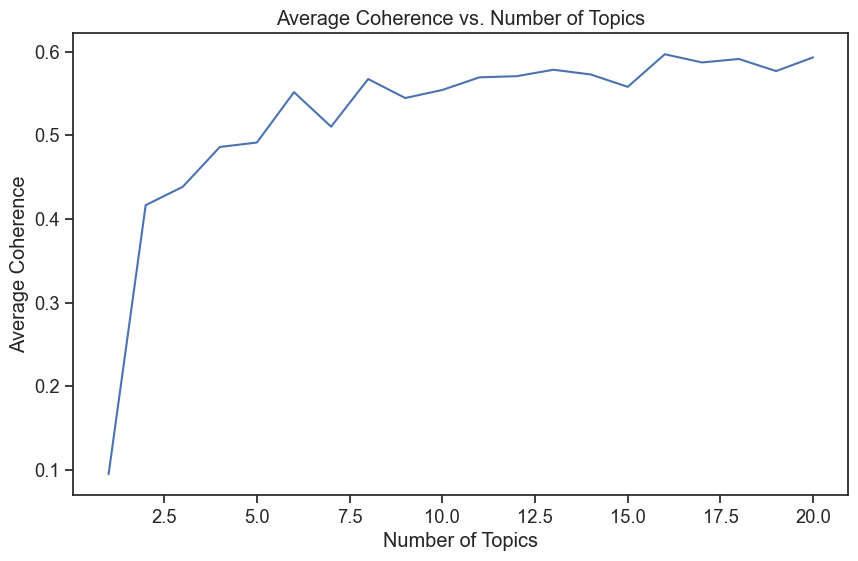

In [399]:
def plot_coherence(training_data, max_topics, iterations):
    coherence_scores = []
    for num_topics in range(1, max_topics + 1):
        
        # Initialize the model:
        model = tp.LDAModel(k=num_topics)
        # Add documents to the model:
        for doc in training_data:
            words = doc.split()
            model.add_doc(words)
        # Train the model:
        for i in range(0, iterations, 10):
            model.train(10)
        
        # Calculate coherence:
        coh = tp.coherence.Coherence(model, coherence='c_v')
        coherence_scores.append(coh.get_score())
        
    # Plot:
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_topics + 1), coherence_scores)
    plt.xlabel('Number of Topics')
    plt.ylabel('Average Coherence')
    plt.title('Average Coherence vs. Number of Topics')
    plt.show()

plot_coherence(training_data, max_topics=20, iterations=100)

### Q7. Topic distributions
Calculate the topic distributions for all tweets and get the top documents for some topics (between 2 and 5) that you think could be more representative of Sanders or Trump.

In [400]:
# Q7a (code)
topic_distributions = [list(doc.get_topic_dist()) for doc in model.docs]
from IPython.display import Markdown, display
import re


def make_md(string):
    display(Markdown(str(string)))

def get_top_docs(docs, topic_distributions, topic_index, n=5):
    if topic_index >= len(topics):
        print("Error: Invalid topic index.")
        return
    
    topic_words = topics[topic_index]
    make_md(f"### ✨Topic {topic_index}✨\n\n{topic_words}\n\n")
    print("---")
    
    sorted_data = sorted([(distribution[topic_index], document) for distribution, document in zip(topic_distributions, docs)], reverse=True)

    for probability, doc in sorted_data[:n]:
        # Make topic words bolded
        for word in topic_words.split():
            if isinstance(doc, str) and word in doc.lower():
                doc = re.sub(f"\\b{word}\\b", f"**{word}**", doc, re.IGNORECASE)

        make_md(f'✨  \n**Topic Probability**: {probability}  \n**Document**: {doc}\n\n')


### Topics that it is my hypothesis that there are more related to Trump.

In [401]:
get_top_docs(titles, topic_distributions, topic_index=15, n=5)

### ✨Topic 15✨

fake news media people never would even many like bad



---


✨  
**Topic Probability**: 0.9246641397476196  
**Document**: @realDonaldTrump_1263977067080830977



✨  
**Topic Probability**: 0.9246641397476196  
**Document**: @realDonaldTrump_1263669433366728704



✨  
**Topic Probability**: 0.9246641397476196  
**Document**: @realDonaldTrump_1248591409743003650



✨  
**Topic Probability**: 0.921387255191803  
**Document**: @realDonaldTrump_1243756098965946368



✨  
**Topic Probability**: 0.921387255191803  
**Document**: @realDonaldTrump_1243755076214231040



In [471]:
get_top_docs(titles, topic_distributions, topic_index =6, n=5)

### ✨Topic 6✨

jobs american new trade economy workers small back president coronavirus



---


✨  
**Topic Probability**: 0.9121865034103394  
**Document**: @realDonaldTrump_1251547205476986880



✨  
**Topic Probability**: 0.900107204914093  
**Document**: @realDonaldTrump_1230880093322403840



✨  
**Topic Probability**: 0.8734517693519592  
**Document**: @realDonaldTrump_893243147580473344



✨  
**Topic Probability**: 0.8734517693519592  
**Document**: @realDonaldTrump_1182682269804310529



✨  
**Topic Probability**: 0.855614960193634  
**Document**: @realDonaldTrump_1241571407361912832



## Topic I think are more relevant to Sanders

In [403]:
get_top_docs(titles, topic_distributions, topic_index= 2, n=5)

### ✨Topic 2✨

health care people bill americans senate republicans public million right



---


✨  
**Topic Probability**: 0.880781352519989  
**Document**: SenSanders_890291753332465664



✨  
**Topic Probability**: 0.880781352519989  
**Document**: SenSanders_860214311330992128



✨  
**Topic Probability**: 0.8728283047676086  
**Document**: SenSanders_710149934109081600



✨  
**Topic Probability**: 0.8637382984161377  
**Document**: SenSanders_924661437062156288



✨  
**Topic Probability**: 0.8637382984161377  
**Document**: SenSanders_884898076795842560



In [475]:
get_top_docs(titles, topic_distributions, topic_index = 3,n=5)

### ✨Topic 3✨

tax trump class people security working social street cut americans



---


✨  
**Topic Probability**: 0.9272794127464294  
**Document**: SenSanders_1094303164805799936



✨  
**Topic Probability**: 0.9243694543838501  
**Document**: SenSanders_1202287585684529152



✨  
**Topic Probability**: 0.9140516519546509  
**Document**: SenSanders_943172894137438208



✨  
**Topic Probability**: 0.9140516519546509  
**Document**: SenSanders_1064958747422982144



✨  
**Topic Probability**: 0.9036344885826111  
**Document**: SenSanders_1094976717725335552



In [405]:
get_top_docs(titles, topic_distributions, topic_index = 8, n=5)

### ✨Topic 8✨

border must war wall security country congress end immigration democrats



---


✨  
**Topic Probability**: 0.9296379685401917  
**Document**: SenSanders_1096096303795396608



✨  
**Topic Probability**: 0.9208391308784485  
**Document**: SenSanders_1090701532797038592



✨  
**Topic Probability**: 0.9173958897590637  
**Document**: @realDonaldTrump_1289731760838721536



✨  
**Topic Probability**: 0.9033322930335999  
**Document**: SenSanders_1067903350337953792



✨  
**Topic Probability**: 0.8999966382980347  
**Document**: @realDonaldTrump_953067686313037829



Interpret the results above. Are there topics that have top tweets only by one politician? Why do you think these topics are more representative of one of the two politicians' views?

## Q7b (words)
Topic 15: This topic seems to be dominated by tweets from @realDonaldTrump, as all the top tweets are attributed to him. The content of these tweets mentions phrases like "fake news," "media," and "people," which are often associated with President Trump's rhetoric regarding the media and criticism against him.

Topic 6: This topic seems to be dominated by tweets from @realDonaldTrump, as four out of the five top tweets are attributed to him. The content of these tweets includes phrases related to jobs, the American economy, trade, and the coronavirus. These are all topics that President Trump has frequently discussed, particularly in the context of his administration's economic policies and response to the COVID-19 pandemic.

Topic 2: On the other hand, this topic appears to be more representative of Senator Sanders' views, as all the top tweets are attributed to him. The content of these tweets includes phrases related to healthcare, public, and Republicans, which are consistent with Senator Sanders' advocacy for universal healthcare and criticism of Republican healthcare policies.

Topic 3: This topic is also dominated by tweets from Sanders, and it is also relevant with his rhetoric about tax cuts for working americans. The content mentions terms like "tax", "working", "cut", which are common to his advocacy in support of the working class. 


Topic 8: This topic appears to have a mix of tweets from both @realDonaldTrump and SenSanders, with one tweet each from the two politicians. The content of these tweets includes phrases related to the border, security, immigration, and Democrats. While one of the top tweets is attributed to President Trump, the other is attributed to Senator Sanders. This suggests that the topic may be relevant to both politicians' views and agendas, albeit to varying degrees.

## Large scale analysis

### Q8. Create a random sample of the whole dataset and visualize the topic distributions for the sampled tweets

In [407]:
# Crete a sample of tweets
import seaborn as sns
from random import sample

target_labels = sample(titles, 100)


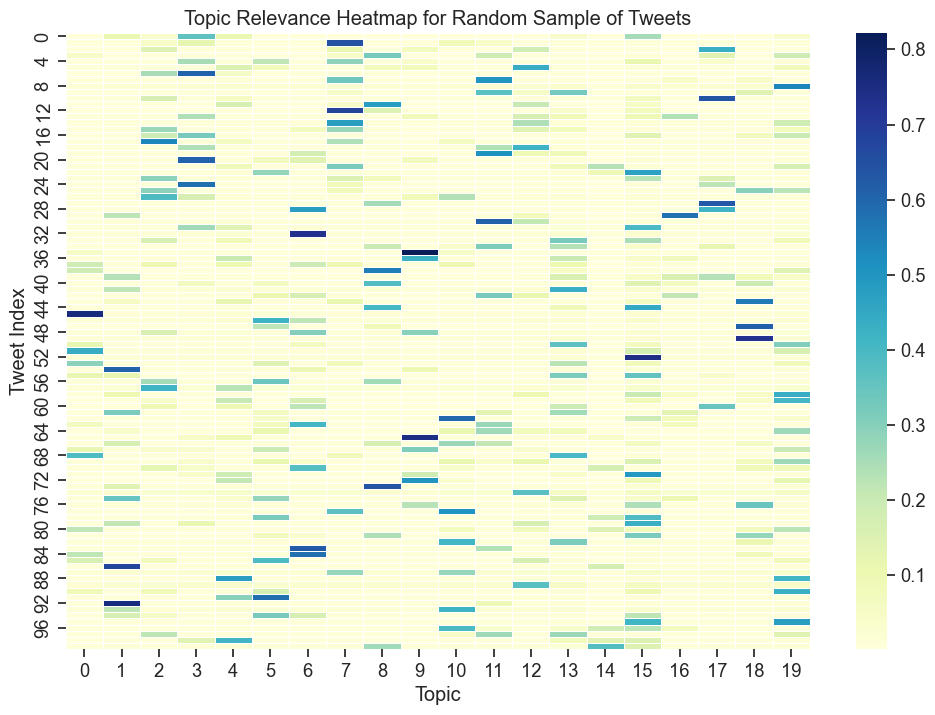

In [408]:
# Function to get the topic distribution for each tweet in the random sample
def visualize_topic_distributions(topic_distributions,titles, target_labels):
    indices = [i for i, title in enumerate(titles) if title in target_labels and i < len(topic_distributions)]
    sample_t_distributions = [topic_distributions[i] for i in indices]
    topic_df = pd.DataFrame(sample_t_distributions)
    
    # Create a heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(topic_df, cmap="YlGnBu", linewidth = .6, xticklabels=True)
    plt.xlabel('Topic')
    plt.ylabel('Tweet Index')
    plt.title('Topic Relevance Heatmap for Random Sample of Tweets')
    plt.show()


# Tip: to display more than 20 tweets you have to change the values of `dim =` in sns.heatmap() 
# sorry but in the documentation of sns.heatmap there is no argument "dim"
visualize_topic_distributions(topic_distributions, titles, target_labels)    

### Difficulty in reading this heatmap.

I don't know if that is what you ask us to do but I find it really difficult to intepret this heatmap, as we don't know which tweet belongs to each politician. Therefore, I will try something else that makes more sense to me.

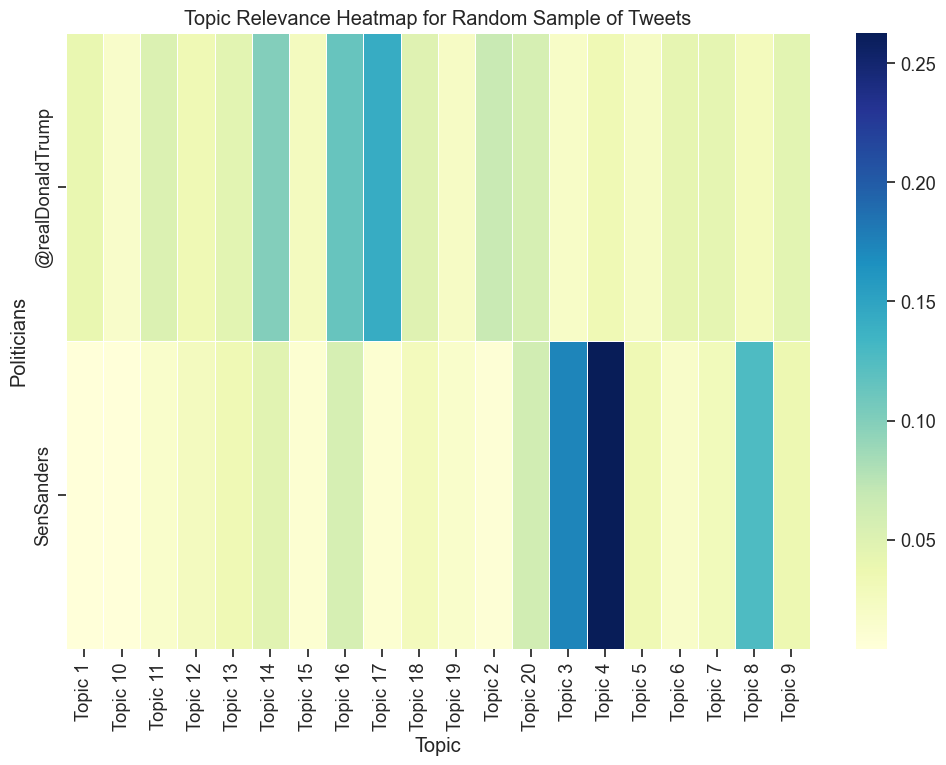

In [474]:
# Q8 (code)
import re
def visualize_topic_distributions_with_politicians(topic_distributions, titles, target_labels):
    indices = [i for i, title in enumerate(titles) if title in target_labels and i < len(topic_distributions)]

    sample_t_distributions = [topic_distributions[i] for i in indices]
    # Ensure all titles are strings
    titles = [str(title) for title in titles]
    
    # Extract sample topic distributions and politician usernames
    sample_politicians_usernames =  [titles[i].split('_')[0] for i in indices]
    topic_df = pd.DataFrame(sample_t_distributions, columns=[f'Topic {i+1}' for i in range(len(sample_t_distributions[0]))])
    topic_df['politician'] = sample_politicians_usernames

    # We have to aggregate and find the mean distribution for every topic for each of the politician in order to have numeric values to plot
    pivot_df = topic_df.pivot_table(index = 'politician', aggfunc = 'mean').reset_index()
    pivot_df = pivot_df.set_index('politician')
    # Create a heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_df, cmap="YlGnBu", linewidth = .6, xticklabels=True)
    plt.xlabel('Topic')
    plt.ylabel('Politicians')
    plt.title('Topic Relevance Heatmap for Random Sample of Tweets')
    plt.show()





visualize_topic_distributions_with_politicians(topic_distributions, titles, target_labels)

### Q9. Interpret the heatmap
Do you see any pattern in the probability distributions of topics for each politician?

Are there topics that are more likely for one of the two politicians?

## Q9 (words)


The heatmap for topic relevance for each politician can give us an better idea of the themes and discussions that are more important for Trump and for Sanders respectively. By doing the topic probability distributions for each politician, we can actually see for each topic how relevant is each of the politicians. Firsty, we can see that Topic 14 (13 for us as the index before was 0 and now 1), 16  annd 17 are more representative of Trump tweets. This is reasonable as the topics revolve around his expressions of gratitude towards the United States, the White House and positive attiTude to national pride and honor, as well as opinions and critiques around news and media. Topic 2 and 11 are also representative of Trump and they are revolving around his involvement in controversies of political events,such as impeachement and media representations, as well as his gratitude and support to the MAGA movement. 
As we can see the topics that are probably more relevant to Sanders tweets, topics 3, 4 and 8 revolve around the health care system (3,8), mentioning the working class and the responsability of the goverment for supporting and giving resources for health care, as well as for health care workers and their wages. Topic 4 is also indicative of Sanders political left-wing rhetoric, mentioning again the working class people, social security and tax cuts. 
Overall, with this adjustion to plot the probability distributions of topic for each politician, we can more easily read and interpret the heatmap. Despite the small sample of tweets (100 tweets) and its imbalance, we see that topics related to Trump align with our knowledge of his political rhetoric, and the same thing happens with the topics that are more relevant to Sanders.

### X2. Optional question 2
(This question is not compulsory, it only allows you to get an extra point)

Make the sample balanced, with 50 tweets by Trump and 50 by Sanders.

In [453]:
# X2 (code)
# Filter tweets by Trump and Sanders
import random


trump_tweets = []
sanders_tweets = []

# Iterate through titles and select tweets for each politician
for title in titles:
    if  title.split('_')[0] == '@realDonaldTrump' and len(trump_tweets) < 50:
        trump_tweets.append(title)
    elif title.split('_')[0] == 'SenSanders' and len (sanders_tweets) < 50:
        sanders_tweets.append(title)

    if len(trump_tweets) == 50 and len(sanders_tweets) == 50:
        break
    
   

# Combine the selected tweets for both politicians
balanced_sample = trump_tweets + sanders_tweets



len(balanced_sample)
target_labels = balanced_sample

In [454]:
def visualize_topic_distributions_with_balanced_politicians(topic_distributions, titles, target_labels):
    indices = [i for i, title in enumerate(titles) if title in target_labels and i < len(topic_distributions)]

    sample_t_distributions = [topic_distributions[i] for i in indices]
    # Ensure all titles are strings
    titles = [str(title) for title in titles]
    
    # Extract sample topic distributions and politician usernames
    sample_politicians_usernames =  [titles[i].split('_')[0] for i in indices]
    topic_df = pd.DataFrame(sample_t_distributions, columns=[f'Topic {i+1}' for i in range(len(sample_t_distributions[0]))])
    topic_df['politician'] = sample_politicians_usernames

    # We have to aggregate and find the mean distribution for every topic for each of the politician in order to have numeric values to plot
    pivot_df = topic_df.pivot_table(index = 'politician', aggfunc = 'mean').reset_index()
    pivot_df = pivot_df.set_index('politician')
    # Create a heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_df, cmap="YlGnBu", linewidth = .6, xticklabels=True)
    plt.xlabel('Topic')
    plt.ylabel('Politicians')
    plt.title('Topic Relevance Heatmap for Balanced Sample of Tweets')
    plt.show()

    
  



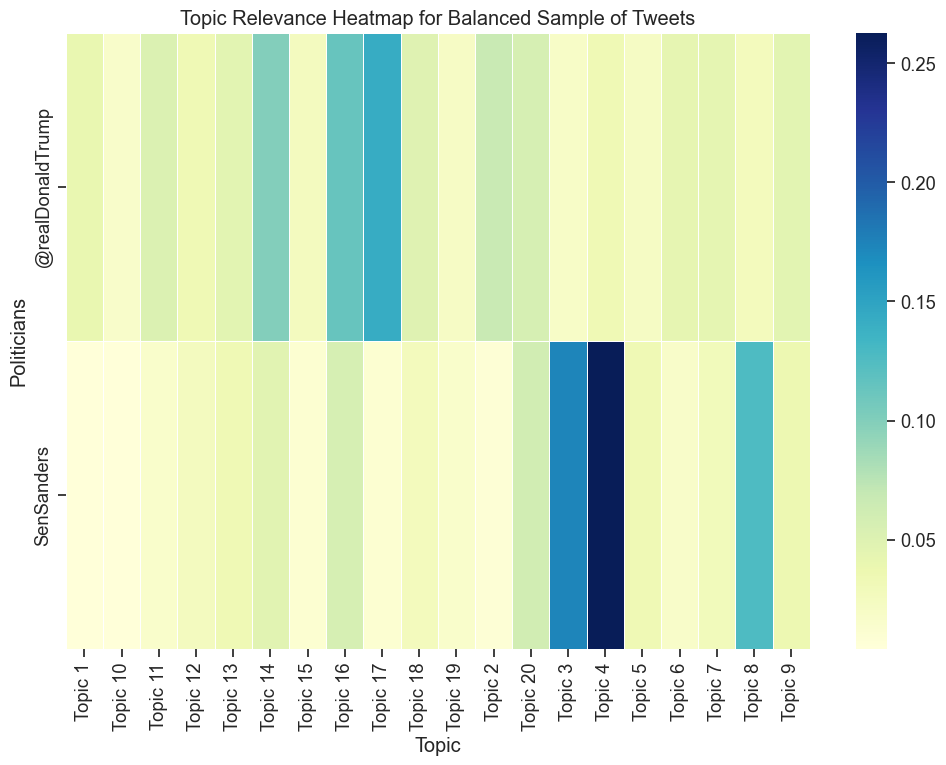

In [455]:
visualize_topic_distributions_with_balanced_politicians(topic_distributions, titles, target_labels)

### X3. Optional question 3
(This question is not compulsory, it only allows you to get an extra point)

Extend the analysis to all the tweets in the dataset.

In [456]:


# Initialize dictionaries to store total topic distributions and counts for each politician
politician_topic_distributions = {}
politician_counts = {}

# Iterate over each title and corresponding topic distribution
for title, topic_distribution in zip(titles, topic_distributions):
    politician_name = title[0]
    if politician_name not in politician_topic_distributions:
        # Initialize lists to store topic distributions and counts for each politician
        politician_topic_distributions[politician_name] = np.array(topic_distribution)
        politician_counts[politician_name] = 1
    else:
        # Add the topic distribution to the existing list and increment the count
        politician_topic_distributions[politician_name] += np.array(topic_distribution)
        politician_counts[politician_name] += 1

# Calculate the mean topic distribution for each politician
mean_topic_distributions = {}
for politician_name in politician_topic_distributions:
    mean_topic_distributions[politician_name] = politician_topic_distributions[politician_name] / politician_counts[politician_name]

# Print the mean topic distribution for each politician
for politician_name, mean_topic_distribution in mean_topic_distributions.items():
    print(f"Politician: {politician_name}")
    print("Mean Topic Distribution:")
    print(mean_topic_distribution)
    print()


Politician: S
Mean Topic Distribution:
[0.01467095 0.01610376 0.08224619 0.15400626 0.03002602 0.02744487
 0.02629617 0.14943694 0.05800591 0.01050238 0.02102809 0.05323949
 0.11650592 0.03440938 0.02237087 0.0473873  0.01884307 0.05864954
 0.02487778 0.0339529 ]

Politician: @
Mean Topic Distribution:
[0.03838579 0.05846287 0.02827089 0.02456138 0.06981331 0.04017835
 0.04960537 0.02420101 0.04349796 0.04764552 0.05380751 0.04141255
 0.03274769 0.08354143 0.02314385 0.0979195  0.05675345 0.04343862
 0.06569341 0.07692746]



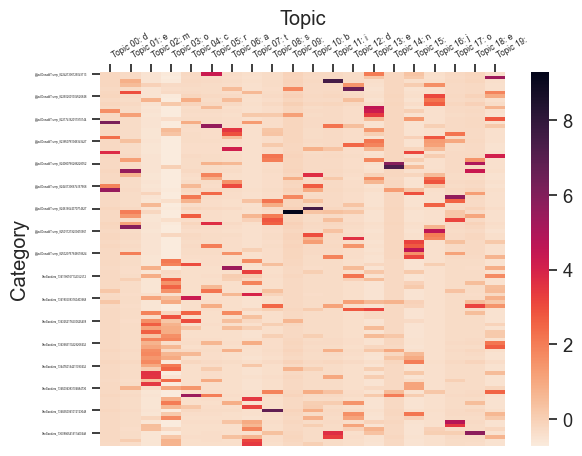

In [457]:
# X3 (code and words)
# Tip: plotting a heatmap for thousands of tweets is not practical.
# Make a comparison based on the numerical values in the `df_norm_col` dataframe (see Week 6 notebook)
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='ticks', font_scale=1.2)


def plot_categories_by_topics_heatmap(titles,
                                      topic_distribution,
                                      topic_words,
                                      output_path=None,
                                      target_label=None,
                                      color_map=sns.cm.rocket_r,
                                      dim=None):
    # Combine the labels and distributions into a list of dictionaries.
    dicts_to_plot = []
    for _label, _distribution in zip(titles, topic_distributions):
        if not target_labels or _label in target_labels:
            for _topic_index, _probability in enumerate(_distribution):
                dicts_to_plot.append({'Probability': float(_probability),
                                      'Category': _label,
                                      'Topic': 'Topic ' + str(_topic_index).zfill(2) + ': ' + ' '.join(topic_words[_topic_index][:5])})

    # Create a dataframe, format it for the heatmap function, and normalize the columns.
    df_to_plot = pd.DataFrame(dicts_to_plot)
    df_wide = df_to_plot.pivot_table(index='Category',
                                     columns='Topic',
                                     values='Probability')
    df_norm_col=(df_wide-df_wide.mean())/df_wide.std()

    # Show the final plot.
    if dim:
        plt.figure(figsize=dim)
    ax = sns.heatmap(df_norm_col, cmap=color_map)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.xticks(rotation=30, ha='left')
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=2)
    plt.tight_layout()
    plt.show()


plot_categories_by_topics_heatmap(titles, topic_distributions, topic_words, target_labels)
